$$\large \color{green}{\textbf{Optimizing the SARIMA algorithm}}$$ 

$$\large \color{blue}{\textbf{Phuong Van Nguyen}}$$
$$\small \color{red}{\textbf{ phuong.nguyen@summer.barcelonagse.eu}}$$


This Machine Learning program was written by Phuong V. Nguyen, based on the $\textbf{Anacoda 1.9.7}$ and $\textbf{Python 3.7}$.


$$\underline{\textbf{Main Contents}}$$

$\text{1. Main Job:}$ The SARIMA algorithm is one of the most common forecasting tools. An optimal SARIMA would make a better forecast for a number of interesting time-series variables.  Thus,  the main purpose of this project is to introduce how to optimize SARIMA algorithm. Three criteria, such as Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), and Log-Likelihood, are used to choose the optimal SARIMA model.

$\text{2. Dataset:}$ 

One can download the dataset used to replicate my project at my Repositories on the Github site below

https://github.com/phuongvnguyen/Optimizing-the-SARIMA-algorithm


# Preparing Problem

##  Loading Libraries



In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
#import pmdarima as pm
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

## Defining some varibales for printing the result

In [3]:
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'

##  Loading Dataset

In [24]:
data = pd.read_excel("data.xlsx")
data.head(5)

,DATE,CLOSE,TICKER,OPEN,HIGH,LOW,VOLUME
0,2007-09-19,125.0,VIC,125.0,125.0,125.0,307840
1,2007-09-20,131.0,VIC,131.0,131.0,130.0,794790
2,2007-09-21,137.0,VIC,137.0,137.0,135.0,1224660
3,2007-09-24,143.0,VIC,143.0,143.0,143.0,551130
4,2007-09-25,150.0,VIC,150.0,150.0,148.0,962110


In [25]:
closePrice = data[['DATE','CLOSE']]
closePrice.head(5)

,DATE,CLOSE
0,2007-09-19,125.0
1,2007-09-20,131.0
2,2007-09-21,137.0
3,2007-09-24,143.0
4,2007-09-25,150.0


In [26]:
closePrice =closePrice.set_index('DATE')
closePrice.head()

,CLOSE
DATE,
2007-09-19,125.0
2007-09-20,131.0
2007-09-21,137.0
2007-09-24,143.0
2007-09-25,150.0


In [27]:
closePrice.index

DatetimeIndex(['2007-09-19', '2007-09-20', '2007-09-21', '2007-09-24',
               '2007-09-25', '2007-09-26', '2007-09-27', '2007-09-28',
               '2007-10-01', '2007-10-02',
               ...
               '2013-12-18', '2013-12-19', '2013-12-20', '2013-12-23',
               '2013-12-24', '2013-12-25', '2013-12-26', '2013-12-27',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name='DATE', length=1570, freq=None)

It is $NOT$ good. Please, find an appropriate solution for fulfilling missing data after using the above function $\textbf{asfreq()}$

# Optimizing model 

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

ARIMA models are denoted with the notation $ARIMA(p, d, q)$. These three parameters account for seasonality, trend, and noise in data:

## Find the Optimal ARIMA Model

This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

## Setting a set of hyperparameters

In [41]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [42]:
print(Bold + 'A Number of combinations: {}'.format(len(pdq)))

A Number of combinations: 27


In [43]:
print(Bold + 'Examples of parameter combinations for ARIMA...' + End)
print('ARIMA: {}'.format(pdq[1]))
print('ARIMA: {}'.format(pdq[2]))
print('ARIMA: {}'.format(pdq[3]))
print('ARIMA: {}'.format(pdq[4]))

Examples of parameter combinations for ARIMA...
ARIMA: (0, 0, 1)
ARIMA: (0, 0, 2)
ARIMA: (0, 1, 0)
ARIMA: (0, 1, 1)


## Finding the Optimal Set of Hyperparameters 

In [44]:
AIC=list()
BIC=list()
para=list()
Lihood=list()
print(Bold + 'Training ARIMA with a Number of Configuration:'+ End)
for param in pdq:
    mod=sm.tsa.statespace.SARIMAX(closePrice,order=param,seasonal_order=(0, 0, 0, 0), 
                                               enforce_stationarity=False, enforce_invertibility=False)
    results= mod.fit()
    para.append(param)
    AIC.append(results.aic)
    BIC.append(results.bic)
    Lihood.append(results.llf)
    print('ARIMA{} - AIC:{} - BIC:{} - Log likehood: {}'.format(param,results.aic, 
                                                                results.bic,results.llf))
    
print(Bold +'The Optimal Choice Suggestions:'+End)
print('The minimum value of Akaike Information Criterion (AIC):{}'.format(min(AIC)))
print('The minimum value of Bayesian Information Criterion (BIC): {}'.format(min(BIC)))
print('The maximum value of Log likehood: {}'.format(min(Lihood)))
print(Bold + 'Descending the Values of AIC and BIC:'+End)
ModSelect=pd.DataFrame({'Hyperparameters':para,'AIC':AIC,'BIC':BIC, 'Log likehood':Lihood}).sort_values(by=['AIC','BIC','Log likehood'],ascending=False)
ModSelect


Training ARIMA with a Number of Configuration:
ARIMA(0, 0, 0) - AIC:18617.295367639003 - BIC:18622.653561391737 - Log likehood: -9307.647683819501
ARIMA(0, 0, 1) - AIC:16500.751416949348 - BIC:16511.466529351168 - Log likehood: -8248.375708474674
ARIMA(0, 0, 2) - AIC:14691.641871976279 - BIC:14707.712626703347 - Log likehood: -7342.820935988139
ARIMA(0, 1, 0) - AIC:7887.295833504402 - BIC:7892.653389705312 - Log likehood: -3942.647916752201
ARIMA(0, 1, 1) - AIC:7842.397791096861 - BIC:7853.111627581573 - Log likehood: -3919.1988955484303
ARIMA(0, 1, 2) - AIC:7837.060965130531 - BIC:7853.129804760183 - Log likehood: -3915.5304825652656
ARIMA(0, 2, 0) - AIC:8700.918534597122 - BIC:8706.275452839478 - Log likehood: -4349.459267298561
ARIMA(0, 2, 1) - AIC:7891.296855355817 - BIC:7902.009415108918 - Log likehood: -3943.6484276779083
ARIMA(0, 2, 2) - AIC:7846.313699117887 - BIC:7862.38062242681 - Log likehood: -3920.1568495589436
ARIMA(1, 0, 0) - AIC:7896.034613259283 - BIC:7906.751000764749

,Hyperparameters,AIC,BIC,Log likehood
0,"(0, 0, 0)",18617.295368,18622.653561,-9307.647684
1,"(0, 0, 1)",16500.751417,16511.466529,-8248.375708
2,"(0, 0, 2)",14691.641872,14707.712627,-7342.820936
6,"(0, 2, 0)",8700.918535,8706.275453,-4349.459267
15,"(1, 2, 0)",8408.781225,8419.495061,-4202.390612
24,"(2, 2, 0)",8260.681782,8276.750622,-4127.340891
9,"(1, 0, 0)",7896.034613,7906.751001,-3946.017307
7,"(0, 2, 1)",7891.296855,7902.009415,-3943.648428
3,"(0, 1, 0)",7887.295834,7892.653390,-3942.647917
25,"(2, 2, 1)",7851.837626,7873.262746,-3921.918813


# Fitting the optimal SARIMA model

In [46]:
mod = sm.tsa.statespace.SARIMAX(closePrice, order=(2, 1, 1),enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(Bold + 'The estimated ARIMA(2,1,1) Model'+ End)
#print(results.summary().tables[1])
print(results.summary())

The estimated ARIMA(2,1,1) Model
                           Statespace Model Results                           
Dep. Variable:                  CLOSE   No. Observations:                 1570
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -3911.899
Date:                Thu, 20 Feb 2020   AIC                           7831.797
Time:                        21:35:53   BIC                           7853.225
Sample:                             0   HQIC                          7839.762
                               - 1570                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0039      0.039     25.897      0.000       0.928       1.080
ar.L2         -0.1366      0.019     -7.047      0.000      -0.175      -0.099
ma.L1         -0.85

# Performing Model Diagnostics

We should always run model diagnostics to investigate any unusual behavior.

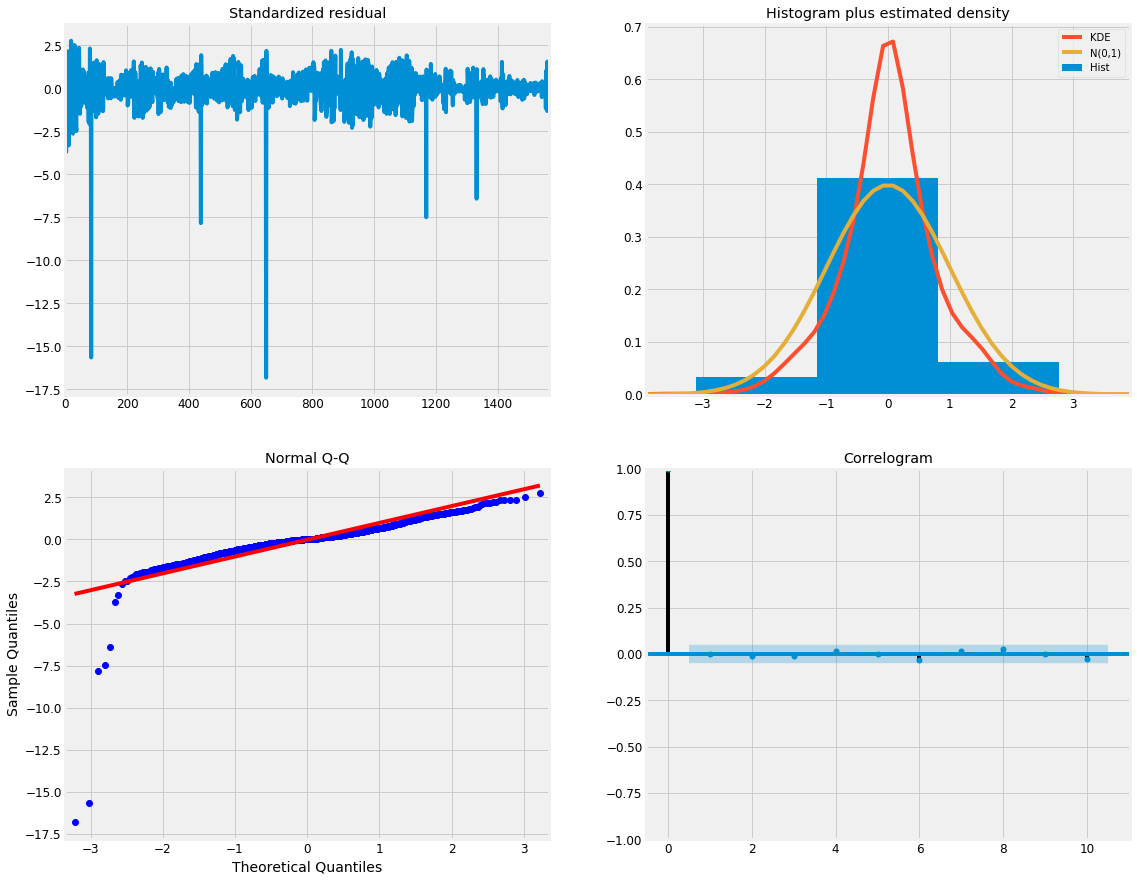

In [49]:
results.plot_diagnostics(figsize=(17,15))
plt.show()

Our primary concern is to ensure that the residuals of our model are $\textbf{uncorrelated}$ and $\textbf{normally distributed with zero-mean}$. If the seasonal ARIMA model does not satisfy these properties, it should be further improved.

In this case, our model diagnostics suggests that the model residuals are not normally distributed based on the following:

1. The residuals over time (top left plot) seem to display an obvious seasonality (downward trend) and moight not a obvious white noise process.


2. In the top right plot, we see that the red KDE line is far from the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are not normally distributed. 

3. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) do not follow the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are not normally distributed.

see more $\text{Q-Q Plot}$ at https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot

4. The autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself, but several espisodes have high correlation with their own lagged values.

Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

Although we have a satisfactory fit, some parameters of our seasonal ARIMA model could be changed to improve our model fit. For example, our grid search only considered a restricted set of parameter combinations, so we may find better models if we widened the grid search.

It is not good enough since our model diagnostics suggests that the model residuals are not near normally distributed.